Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.mstats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# In Colab
!pip list

In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import xgboost as xgb
import seaborn as sns

Import Dataset


In [ ]:
df = pd.read_csv('df.csv')
df['Card Number'] = df['Card Number'].str.replace('*', '').astype(int).astype(int)
df['CBK'] = df['CBK'].map({'Yes': 1, 'No': 0})
df

<ipython-input-7-a7512caefa2c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Card Number'] = df['Card Number'].str.replace('*', '').astype(int).astype(int)


,Unnamed: 0,Card Number,Date,Amount,CBK
0,0,5365182108,2015-05-01 00:01:54,36.54,0
1,1,5365182108,2015-05-01 00:03:46,36.54,0
2,2,4532111239,2015-05-01 00:08:50,69.00,0
3,3,5488271705,2015-05-01 00:27:00,193.43,0
4,4,5316819778,2015-05-01 01:32:46,132.00,0
...,...,...,...,...,...
11122,11123,5148687409,2015-05-30 23:07:01,53.00,0
11123,11124,4393545281,2015-05-30 23:08:47,15.00,0
11124,11125,5491671648,2015-05-30 23:15:24,20.00,0
11125,11126,5187598384,2015-05-30 23:17:41,70.00,0


In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.day_name()

In [ ]:
df['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [ ]:
df['day_of_week_in_num'] = df['day_of_week'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})

In [ ]:
df['day_of_week_sin'] = np.sin(df['day_of_week_in_num'] * (2 * np.pi / 7))
df['day_of_week_cos'] = np.cos(df['day_of_week_in_num'] * (2 * np.pi / 7))

In [ ]:
mindate = df['Date'].min()
df['Timestamp in Seconds'] = (df['Date'] - mindate).dt.total_seconds()
df.drop(columns=['Date'], inplace=True)

In [ ]:
df['Card Frequency'] = df.groupby('Card Number')['Timestamp in Seconds'].transform(lambda x: x.diff().mean()).fillna(0)
df['AmountPerTransactionFrequency'] = df['Amount'] / df.groupby('Card Number')['Timestamp in Seconds'].transform('count')

In [ ]:
df['TimeBetweenTransactions'] = df.groupby('Card Number')['Timestamp in Seconds'].diff().fillna(0)

# Calculate the average time per transaction for each card
df['AverageTimeBetweenTransaction'] = df.groupby('Card Number')['TimeBetweenTransactions'].transform('mean').fillna(0)

In [ ]:
df.head(10)

,Card Number,Amount,CBK,day_of_week,day_of_week_in_num,day_of_week_sin,day_of_week_cos,Timestamp in Seconds,Card Frequency,AmountPerTransactionFrequency,TimeBetweenTransactions,AverageTimeBetweenTransaction
0,5365182108,36.54,0,Friday,4,-0.433884,-0.900969,0.0,112.0,18.270000,0.0,56.000000
1,5365182108,36.54,0,Friday,4,-0.433884,-0.900969,112.0,112.0,18.270000,112.0,56.000000
2,4532111239,69.00,0,Friday,4,-0.433884,-0.900969,416.0,0.0,69.000000,0.0,0.000000
3,5488271705,193.43,0,Friday,4,-0.433884,-0.900969,1506.0,0.0,193.430000,0.0,0.000000
4,5316819778,132.00,0,Friday,4,-0.433884,-0.900969,5452.0,0.0,132.000000,0.0,0.000000
5,5151174107,161.00,0,Friday,4,-0.433884,-0.900969,7712.0,0.0,161.000000,0.0,0.000000
6,4320329111,110.00,0,Friday,4,-0.433884,-0.900969,29241.0,0.0,110.000000,0.0,0.000000
7,5445407141,159.50,0,Friday,4,-0.433884,-0.900969,30502.0,0.0,159.500000,0.0,0.000000
8,5549060358,126.50,1,Friday,4,-0.433884,-0.900969,33117.0,90.5,42.166667,0.0,60.333333
9,5549060358,126.50,1,Friday,4,-0.433884,-0.900969,33214.0,90.5,42.166667,97.0,60.333333


<ipython-input-19-e8a8acc30ba8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.8)


<Axes: >

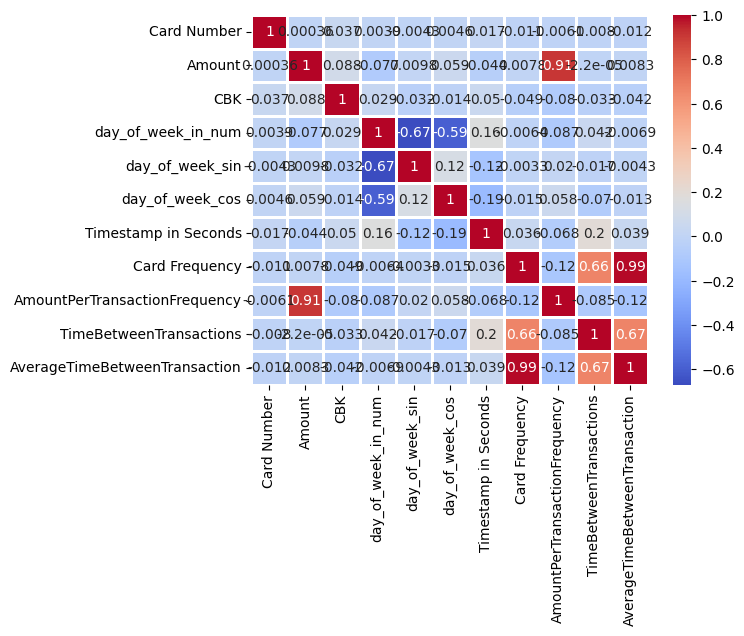

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.8)

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
# Extract numerical columns for scaling
numerical_columns = ['Amount', 'Timestamp in Seconds','Card Frequency', 'AmountPerTransactionFrequency', 'TimeBetweenTransactions', 'AverageTimeBetweenTransaction']

# Apply min-max scaling to numerical columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Combine scaled numerical columns with one-hot encoded 'days_of_week'
df_result = pd.concat([df.drop(columns=numerical_columns), df_scaled], axis=1)'''
df_result = df

In [ ]:
df_result.head(10)

,Card Number,Amount,CBK,day_of_week,day_of_week_in_num,day_of_week_sin,day_of_week_cos,Timestamp in Seconds,Card Frequency,AmountPerTransactionFrequency,TimeBetweenTransactions,AverageTimeBetweenTransaction
0,5365182108,36.54,0,Friday,4,-0.433884,-0.900969,0.0,112.0,18.270000,0.0,56.000000
1,5365182108,36.54,0,Friday,4,-0.433884,-0.900969,112.0,112.0,18.270000,112.0,56.000000
2,4532111239,69.00,0,Friday,4,-0.433884,-0.900969,416.0,0.0,69.000000,0.0,0.000000
3,5488271705,193.43,0,Friday,4,-0.433884,-0.900969,1506.0,0.0,193.430000,0.0,0.000000
4,5316819778,132.00,0,Friday,4,-0.433884,-0.900969,5452.0,0.0,132.000000,0.0,0.000000
5,5151174107,161.00,0,Friday,4,-0.433884,-0.900969,7712.0,0.0,161.000000,0.0,0.000000
6,4320329111,110.00,0,Friday,4,-0.433884,-0.900969,29241.0,0.0,110.000000,0.0,0.000000
7,5445407141,159.50,0,Friday,4,-0.433884,-0.900969,30502.0,0.0,159.500000,0.0,0.000000
8,5549060358,126.50,1,Friday,4,-0.433884,-0.900969,33117.0,90.5,42.166667,0.0,60.333333
9,5549060358,126.50,1,Friday,4,-0.433884,-0.900969,33214.0,90.5,42.166667,97.0,60.333333


In [ ]:
#X = df_result[['Card Number', 'Amount', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'Timestamp in Seconds','Card Frequency', 'AmountPerTransactionFrequency', 'TimeBetweenTransactions', 'AverageTimeBetweenTransaction']]
X = df_result[['Card Number', 'Amount', 'day_of_week_sin', 'day_of_week_cos', 'Timestamp in Seconds','Card Frequency', 'AmountPerTransactionFrequency', 'TimeBetweenTransactions', 'AverageTimeBetweenTransaction']]
y = df_result['CBK']

In [ ]:
X.head(10)

,Card Number,Amount,day_of_week_sin,day_of_week_cos,Timestamp in Seconds,Card Frequency,AmountPerTransactionFrequency,TimeBetweenTransactions,AverageTimeBetweenTransaction
0,5365182108,36.54,-0.433884,-0.900969,0.0,112.0,18.270000,0.0,56.000000
1,5365182108,36.54,-0.433884,-0.900969,112.0,112.0,18.270000,112.0,56.000000
2,4532111239,69.00,-0.433884,-0.900969,416.0,0.0,69.000000,0.0,0.000000
3,5488271705,193.43,-0.433884,-0.900969,1506.0,0.0,193.430000,0.0,0.000000
4,5316819778,132.00,-0.433884,-0.900969,5452.0,0.0,132.000000,0.0,0.000000
5,5151174107,161.00,-0.433884,-0.900969,7712.0,0.0,161.000000,0.0,0.000000
6,4320329111,110.00,-0.433884,-0.900969,29241.0,0.0,110.000000,0.0,0.000000
7,5445407141,159.50,-0.433884,-0.900969,30502.0,0.0,159.500000,0.0,0.000000
8,5549060358,126.50,-0.433884,-0.900969,33117.0,90.5,42.166667,0.0,60.333333
9,5549060358,126.50,-0.433884,-0.900969,33214.0,90.5,42.166667,97.0,60.333333


In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

NameError: name 'train_test_split' is not defined

In [ ]:
# Apply SMOTE-NC to the training data
smoteNC = SMOTENC(categorical_features = [0, 2, 3], random_state=42)
X_train_resampled, y_train_resampled = smoteNC.fit_resample(X_train, y_train)

In [ ]:
for column in X_train_resampled.columns:
    print(f"Data type of {column}: {df[column].dtype}")

Data type of Card Number: int64
Data type of Amount: float64
Data type of day_of_week_sin: float64
Data type of day_of_week_cos: float64
Data type of Timestamp in Seconds: float64
Data type of Card Frequency: float64
Data type of AmountPerTransactionFrequency: float64
Data type of TimeBetweenTransactions: float64
Data type of AverageTimeBetweenTransaction: float64


In [ ]:
print(pd.Series(y_train_resampled).value_counts())

0    8440
1    8440
Name: CBK, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
'''
params = {
    'learning_rate': [0.1, 0.01, 0.001, 0.03],
    'n_estimators': [100, 200, 250, 300, 350],
    'max_depth': [3, 5, 7, 8, 9],
    'subsample': [0.8, 0.9, 1.0, 0.7],
    'gamma': [0, 0.1, 0.2, 0.3],
}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='precision')
grid_search.fit(X_train, y_train)

best_combination = grid_search.best_params_
best_combination.get_xgb_params()'''



# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001, 0.05, 0.3],
    'n_estimators': [100, 200, 300, 250, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4,5 ]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300}
Accuracy on the test set: 0.9883198562443846


In [ ]:
from sklearn.metrics import f1_score, precision_score
f1 = f1_score(y_test, y_pred)
print("F1 on the test set:", f1)
precision = precision_score(y_test, y_pred)
print("precision on the test set:", precision)

F1 on the test set: 0.8699999999999999
precision on the test set: 0.9775280898876404


In [ ]:
# Predict probabilities for the test set
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Set a custom threshold
custom_threshold = 0.5
y_pred = (y_probs >= custom_threshold).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cnf_matrix)
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('f1 score: ', f1)
print('ROC AUC Curve: ', auc)

Confusion Matrix
[[2113    2]
 [  24   87]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2115
           1       0.98      0.78      0.87       111

    accuracy                           0.99      2226
   macro avg       0.98      0.89      0.93      2226
weighted avg       0.99      0.99      0.99      2226

Accuracy:  0.9883198562443846
Precision:  0.9775280898876404
Recall:  0.7837837837837838
f1 score:  0.8699999999999999
ROC AUC Curve:  0.8914190786531212


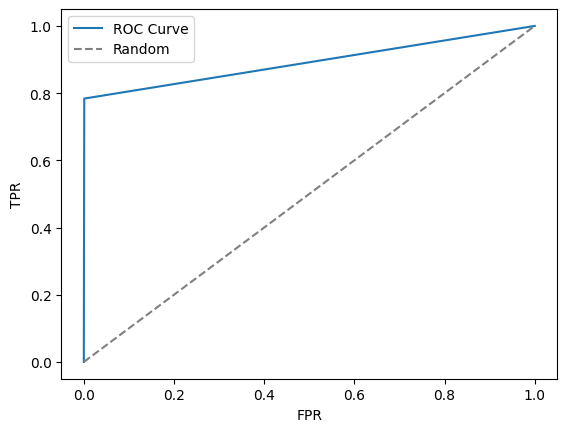

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1], linestyle='--', label='Random', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()